In [1]:
from IPython.display import HTML
HTML('<iframe src=https://www.dropbox.com/home width=600 height=300></iframe>')

In [2]:
!mkdir -p pcap

In [3]:
cd pcap

/home/rufina/pcap


In [5]:
url="https://www.dropbox.com/home?preview=session_challenger_dropbox-upload.pcap"

In [6]:
import urllib
urllib.urlretrieve(url, "/home/rufina/Documents/github-dropbox/rename/dropbox-upload.pcap")

('/home/rufina/Documents/github-dropbox/rename/dropbox-upload.pcap',
 <httplib.HTTPMessage instance at 0x7f6bff3cf3b0>)

In [8]:
ls -l /home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap

-rw-r--r-- 1 root root 422517 Mar 20 20:12 /home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap


In [9]:
!md5sum /home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap

c1d20b4bf13e5bda08e02f391f743daf  /home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap


In [11]:
!tshark -v

TShark 1.10.6 (v1.10.6 from master-1.10)

Copyright 1998-2014 Gerald Combs <gerald@wireshark.org> and contributors.
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) with GLib 2.39.91, with libpcap, with libz 1.2.8, with POSIX
capabilities (Linux), without libnl, with SMI 0.4.8, with c-ares 1.10.0, with
Lua 5.2, without Python, with GnuTLS 2.12.23, with Gcrypt 1.5.3, with MIT
Kerberos, with GeoIP.

Running on Linux 3.13.0-46-generic, with locale en_US.UTF-8, with libpcap
version 1.5.3, with libz 1.2.8.
Intel(R) Xeon(R) CPU E5-1607 v3 @ 3.10GHz

Built using gcc 4.8.2.


In [12]:
!tshark -n -r /home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap -T fields -Eheader=y -e frame.number -e frame.len > frame.len

In [13]:
!head -10 frame.len

frame.number	frame.len
1	60
2	60
3	60
4	134
5	86
6	191
7	76
8	170
9	134


In [14]:
import pandas as pd

In [15]:
df=pd.read_table("frame.len")

In [16]:
df

,frame.number,frame.len
0,1,60
1,2,60
2,3,60
3,4,134
4,5,86
5,6,191
6,7,76
7,8,170
8,9,134
9,10,60


In [17]:
df["frame.len"].describe()

count    2381.000000
mean      161.443511
std       294.732521
min        54.000000
25%        60.000000
50%        66.000000
75%       125.000000
max      2902.000000
Name: frame.len, dtype: float64

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
figsize(10,6)

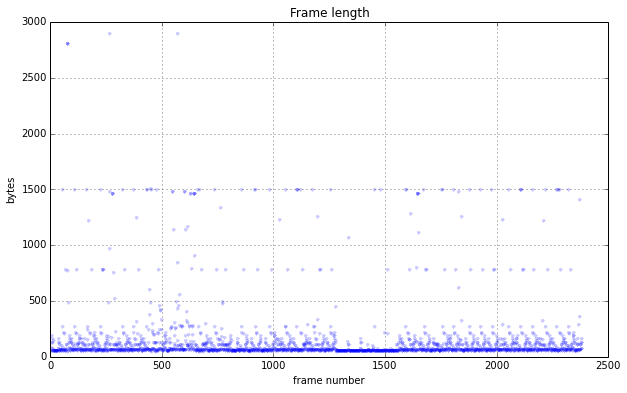

In [20]:
df["frame.len"].plot(style=".", alpha=0.2)
title("Frame length")
ylabel("bytes")
xlabel("frame number")

In [21]:
import subprocess
import datetime
import pandas as pd

def read_pcap(filename, fields=[], display_filter="", 
              timeseries=False, strict=False):
    if timeseries:
        fields = ["frame.time_epoch"] + fields
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = fields if strict else []
    if display_filter:
        display_filters.append(display_filter)
    filterspec = "-R '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    if timeseries:
        df = pd.read_table(proc.stdout, 
                        index_col = "frame.time_epoch", 
                        parse_dates=True, 
                        date_parser=datetime.datetime.fromtimestamp)
    else:
        df = pd.read_table(proc.stdout)
    return df

In [22]:
framelen=read_pcap("/home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap", ["frame.len"], timeseries=True)
framelen

,frame.len
frame.time_epoch,
2015-03-20 20:09:48.834084,60
2015-03-20 20:09:48.834105,60
2015-03-20 20:09:48.933779,60
2015-03-20 20:09:48.951762,134
2015-03-20 20:09:48.952819,86
2015-03-20 20:09:48.953278,191
2015-03-20 20:09:48.953784,76
2015-03-20 20:09:48.954161,170
2015-03-20 20:09:48.954830,134


In [23]:
bytes_per_second=framelen.resample("S", how="sum")

In [24]:
bytes_per_second.head()

,frame.len
frame.time_epoch,
2015-03-20 20:09:48,971
2015-03-20 20:09:49,816
2015-03-20 20:09:50,480
2015-03-20 20:09:51,1409
2015-03-20 20:09:52,3944


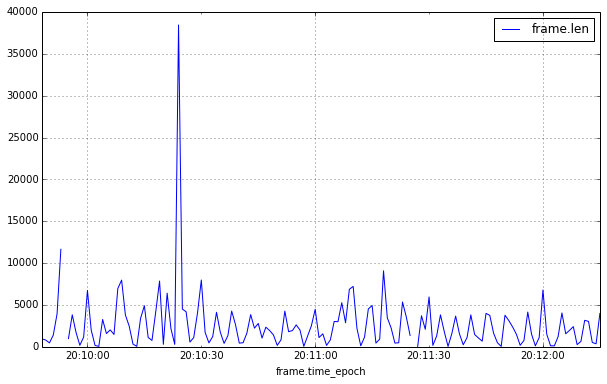

In [25]:
bytes_per_second.plot()

In [26]:
fields=["tcp.stream", "ip.src", "ip.dst", "tcp.seq", "tcp.ack", "tcp.window_size", "tcp.len"]
ts=read_pcap("/home/rufina/Documents/github-dropbox/rename/session_challenger_dropbox-upload.pcap", fields, timeseries=True, strict=True)
ts

,tcp.stream,ip.src,ip.dst,tcp.seq,tcp.ack,tcp.window_size,tcp.len
frame.time_epoch,,,,,,,
2015-03-20 20:09:48.951762,0,58.65.177.218,128.119.247.197,1,1,91,68
2015-03-20 20:09:48.954830,0,128.119.247.197,58.65.177.218,1,69,243,68
2015-03-20 20:09:49.182995,0,58.65.177.218,128.119.247.197,69,69,91,84
2015-03-20 20:09:49.219690,0,128.119.247.197,58.65.177.218,69,153,243,0
2015-03-20 20:09:51.758899,0,128.119.247.197,58.65.177.218,69,153,243,68
2015-03-20 20:09:51.984971,0,58.65.177.218,128.119.247.197,153,137,91,52
2015-03-20 20:09:51.985007,0,128.119.247.197,58.65.177.218,137,205,243,0
2015-03-20 20:09:51.985017,0,58.65.177.218,128.119.247.197,205,137,91,0
2015-03-20 20:09:51.985551,1,128.119.247.197,58.65.177.218,0,1,28960,0


In [27]:
stream=ts[ts["tcp.stream"] == 10]

In [28]:
stream

,tcp.stream,ip.src,ip.dst,tcp.seq,tcp.ack,tcp.window_size,tcp.len
frame.time_epoch,,,,,,,
2015-03-20 20:10:08.693466,10,64.233.171.188,128.119.247.197,1,1,366,423
2015-03-20 20:10:08.693519,10,128.119.247.197,64.233.171.188,1,424,1267,0
2015-03-20 20:10:53.863693,10,128.119.247.197,64.233.171.188,0,424,1267,0
2015-03-20 20:10:53.884313,10,64.233.171.188,128.119.247.197,424,1,366,0
2015-03-20 20:11:38.919687,10,128.119.247.197,64.233.171.188,0,424,1267,0
2015-03-20 20:11:38.940310,10,64.233.171.188,128.119.247.197,424,1,366,0


In [29]:
print stream.to_string()

                            tcp.stream           ip.src           ip.dst  tcp.seq  tcp.ack  tcp.window_size  tcp.len
frame.time_epoch                                                                                                    
2015-03-20 20:10:08.693466          10   64.233.171.188  128.119.247.197        1        1              366      423
2015-03-20 20:10:08.693519          10  128.119.247.197   64.233.171.188        1      424             1267        0
2015-03-20 20:10:53.863693          10  128.119.247.197   64.233.171.188        0      424             1267        0
2015-03-20 20:10:53.884313          10   64.233.171.188  128.119.247.197      424        1              366        0
2015-03-20 20:11:38.919687          10  128.119.247.197   64.233.171.188        0      424             1267        0
2015-03-20 20:11:38.940310          10   64.233.171.188  128.119.247.197      424        1              366        0


In [30]:
stream["type"] = stream.apply(lambda x: "client" if x["ip.src"] == stream.irow(0)["ip.src"] else "server", axis=1)

In [31]:
print stream.to_string()

                            tcp.stream           ip.src           ip.dst  tcp.seq  tcp.ack  tcp.window_size  tcp.len    type
frame.time_epoch                                                                                                            
2015-03-20 20:10:08.693466          10   64.233.171.188  128.119.247.197        1        1              366      423  client
2015-03-20 20:10:08.693519          10  128.119.247.197   64.233.171.188        1      424             1267        0  server
2015-03-20 20:10:53.863693          10  128.119.247.197   64.233.171.188        0      424             1267        0  server
2015-03-20 20:10:53.884313          10   64.233.171.188  128.119.247.197      424        1              366        0  client
2015-03-20 20:11:38.919687          10  128.119.247.197   64.233.171.188        0      424             1267        0  server
2015-03-20 20:11:38.940310          10   64.233.171.188  128.119.247.197      424        1              366        0  client


In [32]:
client_stream=stream[stream.type == "client"]

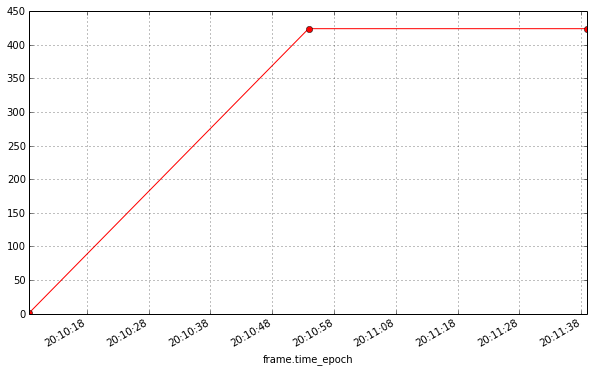

In [33]:
client_stream["tcp.seq"].plot(style="r-o")

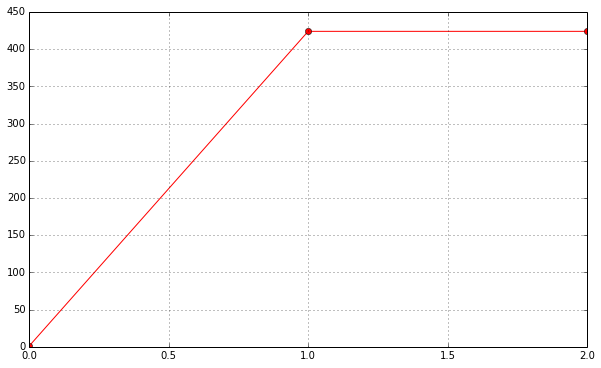

In [34]:
client_stream.index = arange(len(client_stream))
client_stream["tcp.seq"].plot(style="r-o")

In [35]:
per_stream=ts.groupby("tcp.stream")
per_stream.head()

tcp.stream           ip.src  \
tcp.stream frame.time_epoch                                          
0          2015-03-20 20:09:48.951762           0    58.65.177.218   
           2015-03-20 20:09:48.954830           0  128.119.247.197   
           2015-03-20 20:09:49.182995           0    58.65.177.218   
           2015-03-20 20:09:49.219690           0  128.119.247.197   
           2015-03-20 20:09:51.758899           0  128.119.247.197   
1          2015-03-20 20:09:51.985551           1  128.119.247.197   
           2015-03-20 20:09:52.212591           1    58.65.177.218   
           2015-03-20 20:09:52.226068           1  128.119.247.197   
           2015-03-20 20:09:52.453142           1    58.65.177.218   
           2015-03-20 20:09:52.453172           1    58.65.177.218   
2          2015-03-20 20:09:53.328080           2  128.119.247.197   
           2015-03-20 20:09:53.589290           2    222.66.95.253   
           2015-03-20 20:09:53.589355           2    222.66.95.253   
           2015-03-20 20:09:53.589380           2  128.119.247.197   
           2015-03-20 20:09:53.631848           2  128.119.247.197   
3          2015-03-20 20:09:55.936920           3  128.119.247.197   
           2015-03-20 20:09:56.163200           3    58.65.177.218   
           2015-03-20 20:09:56.177729           3  128.119.247.197   
           2015-03-20 20:09:56.404074           3    58.65.177.218   
           2015-03-20 20:09:56.405727           3    58.65.177.218   
4          2015-03-20 20:09:56.720181           4   64.233.171.189   
           2015-03-20 20:09:56.720221           4  128.119.247.197   
           2015-03-20 20:09:57.621957           4   64.233.171.189   
           2015-03-20 20:09:57.621990           4  128.119.247.197   
5          2015-03-20 20:09:58.951725           5  128.119.247.197   
           2015-03-20 20:09:58.959175           5   216.58.219.206   
6          2015-03-20 20:09:59.778406           6  128.119.247.197   
           2015-03-20 20:10:00.004911           6    58.65.177.218   
           2015-03-20 20:10:00.015877           6  128.119.247.197   
7          2015-03-20 20:10:00.167454           7  128.119.247.197   
           2015-03-20 20:10:00.167602           7  128.119.247.197   
           2015-03-20 20:10:00.175378           7   216.58.219.197   
           2015-03-20 20:10:00.175407           7   216.58.219.197   
           2015-03-20 20:10:00.175427           7   216.58.219.197   
6          2015-03-20 20:10:00.242249           6    58.65.177.218   
           2015-03-20 20:10:00.242982           6    58.65.177.218   
8          2015-03-20 20:10:04.514173           8  128.119.247.197   
           2015-03-20 20:10:04.741094           8    58.65.177.218   
           2015-03-20 20:10:04.754325           8  128.119.247.197   
           2015-03-20 20:10:04.981821           8    58.65.177.218   
           2015-03-20 20:10:04.987582           8    58.65.177.218   
9          2015-03-20 20:10:06.031691           9  128.119.247.197   
           2015-03-20 20:10:06.124830           9     88.198.59.19   
10         2015-03-20 20:10:08.693466          10   64.233.171.188   
           2015-03-20 20:10:08.693519          10  128.119.247.197   
5          2015-03-20 20:10:08.945570           5  128.119.247.197   
           2015-03-20 20:10:08.945678           5  128.119.247.197   
           2015-03-20 20:10:08.945782           5  128.119.247.197   
11         2015-03-20 20:10:09.175433          11  128.119.247.197   
           2015-03-20 20:10:09.175571          11  128.119.247.197   
           2015-03-20 20:10:09.175752          11  128.119.247.197   
           2015-03-20 20:10:09.182703          11   216.58.219.238   
           2015-03-20 20:10:09.182731          11   216.58.219.238   
12         2015-03-20 20:10:10.235130          12  128.119.247.197   
           2015-03-20 20:10:10.461134          12    58.65.177.218   
           2015-03-20 20:10:10.476950          12

In [36]:
bytes_per_stream = per_stream["tcp.len"].sum()
bytes_per_stream.head()

tcp.stream
0              340
1             3186
2             9460
3             3202
4             1688
Name: tcp.len, dtype: int64

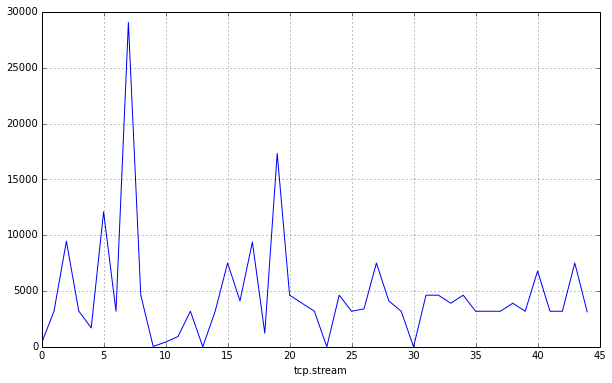

In [37]:
bytes_per_stream.plot()

In [38]:
bytes_per_stream.max()

29063

In [ ]:
biggest_stream=bytes_per_stream.idxmax()
biggest_stream